In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

***Thoughts from Anna***

1. I think that when the current code is reading the parquet files it is missing with the time_of_day column. It may be dropping zeros if there is a zero in from of the int. This would lose data as 4 am would be represented by a number string starting with "04" in the %H:%M:%S.%9f format.

2. Under the assumption that problematic internet usage happens a lot at night, we could use the time_of_day column to filter for night rows. Then look at the light column. Could great a count metric for something like, number of times lux was about 300 for a 15 minutes period. 

3. Anglez is a measurement of people turning over in their sleep. Under the assumption that too much internet use causes sleep disturbances, we could figure out a threshold for what would be a considered someone turning over in bed. We could also limit the count for these during expected sleeping periods.

4. Assuming internet addiction leads to less physical movement, we could use average enmo value as an input.

***Column Variable Descriptions:***

**id** - The patient identifier corresponding to the id field in train/test.csv.

**step** - An integer timestep for each observation within a series.

**X, Y, Z** - Measure of acceleration, in g, experienced by the wrist-worn watch along each standard axis.

**enmo** - As calculated and described by the wristpy package, ENMO is the Euclidean Norm Minus One of all accelerometer signals (along each of the x-, y-, and z-axis, measured in g-force) with negative values rounded to zero. Zero values are indicative of periods of no motion. While no standard measure of acceleration exists in this space, this is one of the several commonly computed features.

**anglez** - As calculated and described by the wristpy package, Angle-Z is a metric derived from individual accelerometer components and refers to the angle of the arm relative to the horizontal plane.

**non-wear_flag** - A flag (0: watch is being worn, 1: the watch is not worn) to help determine periods when the watch has been removed, based on the GGIR definition, which uses the standard deviation and range of the accelerometer data.

**light** - Measure of ambient light in lux. See ​​here for details.

**battery_voltage** - A measure of the battery voltage in mV.

**time_of_day** - Time of day representing the start of a 5s window that the data has been sampled over, with format %H:%M:%S.%9f.

**weekday** - The day of the week, coded as an integer with 1 being Monday and 7 being Sunday.

**quarter** - The quarter of the year, an integer from 1 to 4.

**relative_date_PCIAT** - The number of days (integer) since the PCIAT test was administered (negative days indicate that the actigraphy data has been collected before the test was administered).

***Lux (Light) Measures:***

1 Twilight

5 Minimal Street Lighting

10 Sunset

50 Family Living Room

80 Hallway 

100 Very Dark Overcast Day 

320 - 500 Office Lighting 

400 Sunrise/Sunset 

1,000 Overcast Day 

10,000-25,000 Full Daylight 

32,000-130,000 Direct Sunlight


"The scale is somewhat proportional, meaning that each increase of one represents a ten-fold increase in brightness"



Source: https://actigraphcorp.my.site.com/support/s/article/Lux-Measurements

Screens deliver much less, according to data on 20 devices provided to Elemental by Rea at the Lighting Research Center. At full brightness in color, typical screens in your home deliver anywhere from 37.8 lux to less than one lux at normal viewing distances.

Some of Rea’s data:

Desktop computers: 0.5 to 37.8 lux

Laptop computers: 1.7 to 14.5 lux

Tablets: 0.7 to 5.9 lux

Smartphones: 0.6 to 2.1 lux

TVs: 0.03 to 0.5 lux

Source: https://elemental.medium.com/does-blue-light-from-screens-really-ruin-sleep-ae5e758c453e#:~:text=At%20full%20brightness%20in%20color,computers%3A%201.7%20to%2014.5%20lux

In [2]:
# Path to  #
# data_dir = os.path.abspath(os.path.join('..', 'data'))
#"/Users/annamowat/Documents/GitHub/datasci207_fa24_01_LMRSW/data/series_train.parquet"
DATA_PATH = "/Users/tiffanywei/Desktop/child-mind-institute-problematic-internet-use/series_train.parquet" # replace with your path

In [3]:
def load_data(path_to_data):
    '''Load parquet data and their corresponding person ids
    Parameters:
    path_to_data (str): This is the path to data
    
    Returns:
    parquets (list of dataframes):

    '''
    ## load images and labels
    parquets = []
    
    for folder in os.listdir(DATA_PATH):
        if folder == ".DS_Store":
            continue
        else:
            for image in os.listdir(os.path.join(DATA_PATH,folder)):
                # Load parquet
                path = os.path.join(DATA_PATH,folder,image)
                parquet = pd.read_parquet(path) 
                parquet["id"] = folder[3:]

                # Append image and label
                parquets.append(parquet)


    return parquets

In [5]:
def convert_int_to_datetime(int_value):
    """Converts an integer representing time in the format %H:%M:%S.%f to datetime."""
    return pd.to_datetime(int_value, format="%H:%M:%S.%f")

In [4]:
parquets = load_data(DATA_PATH)

In [9]:
len(parquets)

996

In [5]:
test = parquets[0]

In [6]:
test.head()

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id
0,0,-0.468869,0.412020,-0.236458,0.042506,-19.824650,0.0,27.666666,4179.000000,57480000000000,4,1,28.0,0d01bbf2
1,1,-0.662526,0.533484,0.064034,0.052847,4.300246,0.0,12.666667,4178.666504,57485000000000,4,1,28.0,0d01bbf2
2,2,-0.611384,0.227252,-0.150882,0.060734,-16.545208,0.0,47.000000,4178.333496,57490000000000,4,1,28.0,0d01bbf2
3,3,-0.385799,0.552782,-0.500523,0.070440,-36.452175,0.0,63.799999,4178.000000,57495000000000,4,1,28.0,0d01bbf2
4,4,0.016133,0.031981,-0.825109,0.081058,-67.488388,0.0,6.000000,4177.666504,57500000000000,4,1,28.0,0d01bbf2


In [49]:
# Convert time_of_day to a datetime column
test['time_datetime'] = test['time_of_day'].apply(convert_int_to_datetime)

ValueError: time data "57480000000000" doesn't match format "%H:%M:%S.%f", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [50]:
# First test to see if they ever took the watch off
test[test["non-wear_flag"] != 0.0]

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id,datetime_time_of_day


In [48]:
test.head(10)

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id,day_name,light_description
0,0,-0.468869,0.412020,-0.236458,0.042506,-19.824650,0.0,27.666666,4179.000000,57480000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers
1,1,-0.662526,0.533484,0.064034,0.052847,4.300246,0.0,12.666667,4178.666504,57485000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers
2,2,-0.611384,0.227252,-0.150882,0.060734,-16.545208,0.0,47.000000,4178.333496,57490000000000,4,1,28.0,0d01bbf2,Thursday,Unknown Lux Level
3,3,-0.385799,0.552782,-0.500523,0.070440,-36.452175,0.0,63.799999,4178.000000,57495000000000,4,1,28.0,0d01bbf2,Thursday,Unknown Lux Level
4,4,0.016133,0.031981,-0.825109,0.081058,-67.488388,0.0,6.000000,4177.666504,57500000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers
5,5,0.111447,-0.026677,-0.992046,0.013062,-83.395927,0.0,17.500000,4177.333496,57505000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers
6,6,0.254066,0.040278,-0.923824,0.024093,-73.851051,0.0,29.000000,4177.000000,57510000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers
7,7,0.067536,0.619501,-0.516291,0.047309,-35.223614,0.0,40.500000,4176.666504,57515000000000,4,1,28.0,0d01bbf2,Thursday,Unknown Lux Level
8,8,-0.057226,0.551338,-0.530081,0.050739,-39.340076,0.0,21.250000,4176.333496,57520000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers
9,9,-0.332856,0.038781,-0.547539,0.045239,-49.816551,0.0,21.799999,4176.000000,57525000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269335 entries, 0 to 269334
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   step                 269335 non-null  uint32 
 1   X                    269335 non-null  float32
 2   Y                    269335 non-null  float32
 3   Z                    269335 non-null  float32
 4   enmo                 269335 non-null  float32
 5   anglez               269335 non-null  float32
 6   non-wear_flag        269335 non-null  float32
 7   light                269335 non-null  float32
 8   battery_voltage      269335 non-null  float32
 9   time_of_day          269335 non-null  int64  
 10  weekday              269335 non-null  int8   
 11  quarter              269335 non-null  int8   
 12  relative_date_PCIAT  269335 non-null  float32
 13  id                   269335 non-null  object 
 14  day_name             269335 non-null  object 
 15  light_description

In [28]:
test["light"].max()

2659.6667

In [29]:
test["time_of_day"].value_counts()

time_of_day
32330000000000    31
32260000000000    31
32265000000000    31
28560000000000    31
28565000000000    31
                  ..
15365000000000     1
83095000000000     1
84180000000000     1
84185000000000     1
20935000000000     1
Name: count, Length: 17106, dtype: int64

In [30]:
test["light"].min()

0.0

In [31]:
test["light"].value_counts()

light
0.500000     8966
1.000000     4820
0.000000     3659
3.000000     3341
1.500000     2927
             ... 
2.051440        1
2.047325        1
2.039095        1
2.034979        1
34.635418       1
Name: count, Length: 97685, dtype: int64

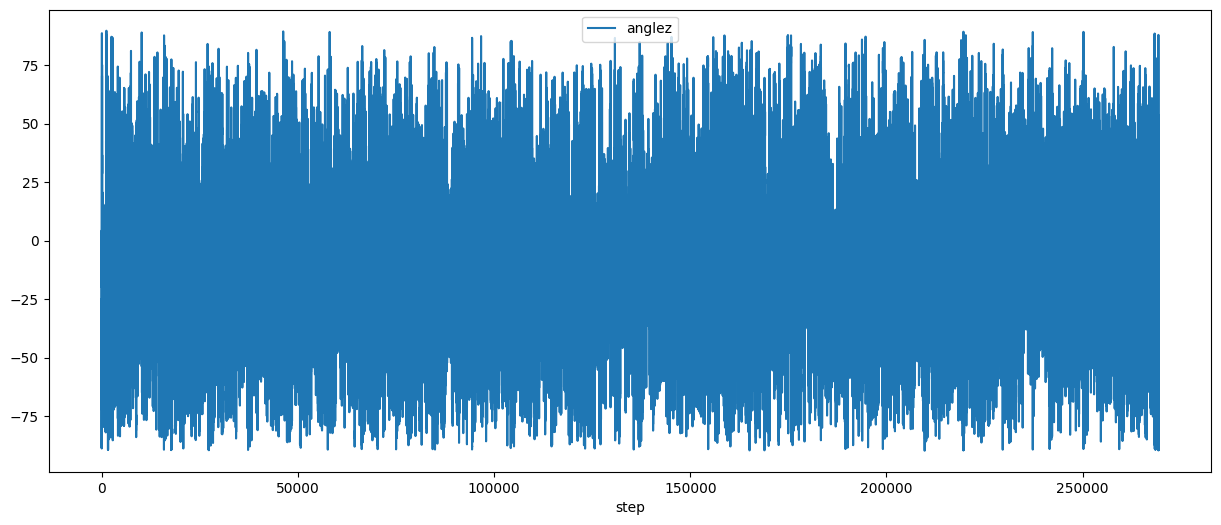

In [58]:
test.plot.line(x='step', y='anglez',figsize=(15, 6))
plt.show()


In [10]:
day_dict = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday"
}

test['day_name'] = test['weekday'].map(day_dict)
test.head(5)

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id,day_name
0,0,-0.468869,0.412020,-0.236458,0.042506,-19.824650,0.0,27.666666,4179.000000,57480000000000,4,1,28.0,0d01bbf2,Thursday
1,1,-0.662526,0.533484,0.064034,0.052847,4.300246,0.0,12.666667,4178.666504,57485000000000,4,1,28.0,0d01bbf2,Thursday
2,2,-0.611384,0.227252,-0.150882,0.060734,-16.545208,0.0,47.000000,4178.333496,57490000000000,4,1,28.0,0d01bbf2,Thursday
3,3,-0.385799,0.552782,-0.500523,0.070440,-36.452175,0.0,63.799999,4178.000000,57495000000000,4,1,28.0,0d01bbf2,Thursday
4,4,0.016133,0.031981,-0.825109,0.081058,-67.488388,0.0,6.000000,4177.666504,57500000000000,4,1,28.0,0d01bbf2,Thursday


In [11]:
test.shape

(269335, 15)

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269335 entries, 0 to 269334
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   step                 269335 non-null  uint32 
 1   X                    269335 non-null  float32
 2   Y                    269335 non-null  float32
 3   Z                    269335 non-null  float32
 4   enmo                 269335 non-null  float32
 5   anglez               269335 non-null  float32
 6   non-wear_flag        269335 non-null  float32
 7   light                269335 non-null  float32
 8   battery_voltage      269335 non-null  float32
 9   time_of_day          269335 non-null  int64  
 10  weekday              269335 non-null  int8   
 11  quarter              269335 non-null  int8   
 12  relative_date_PCIAT  269335 non-null  float32
 13  id                   269335 non-null  object 
 14  day_name             269335 non-null  object 
dtypes: float32(9), in

In [13]:
lux_measures = {
    np.float32(1): "Twilight",
    np.float32(5): "Minimal Street Lighting",
    np.float32(10): "Sunset",
    np.float32(50): "Family Living Room",
    np.float32(80): "Hallway",
    np.float32(100): "Very Dark Overcast Day",
    (np.float32(320), np.float32(500)): "Office Lighting",  # range as float32
    np.float32(400): "Sunrise/Sunset",
    np.float32(1000): "Overcast Day",
    (np.float32(10000), np.float32(25000)): "Full Daylight",  # range as float32
    (np.float32(32000), np.float32(130000)): "Direct Sunlight",  # range as float32
    (np.float32(0.5), np.float32(37.8)): "Desktop Computers",  # range as float32
    (np.float32(1.7), np.float32(14.5)): "Laptop Computers",  # range as float32
    (np.float32(0.7), np.float32(5.9)): "Tablets",  # range as float32
    (np.float32(0.6), np.float32(2.1)): "Smartphones",  # range as float32
    (np.float32(0.03), np.float32(0.5)): "TVs"  # range as float32
}

def map_lux_to_description(lux_value):
    for key, description in lux_measures.items():
        if isinstance(key, tuple):  # Check for range keys
            if key[0] <= lux_value <= key[1]:
                return description
        elif lux_value == key:  # Exact match for single values
            return description
    return "Unknown Lux Level"  # Default if no match is found

test['light_description'] = test['light'].apply(map_lux_to_description)
test.head(5)

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id,day_name,light_description
0,0,-0.468869,0.412020,-0.236458,0.042506,-19.824650,0.0,27.666666,4179.000000,57480000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers
1,1,-0.662526,0.533484,0.064034,0.052847,4.300246,0.0,12.666667,4178.666504,57485000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers
2,2,-0.611384,0.227252,-0.150882,0.060734,-16.545208,0.0,47.000000,4178.333496,57490000000000,4,1,28.0,0d01bbf2,Thursday,Unknown Lux Level
3,3,-0.385799,0.552782,-0.500523,0.070440,-36.452175,0.0,63.799999,4178.000000,57495000000000,4,1,28.0,0d01bbf2,Thursday,Unknown Lux Level
4,4,0.016133,0.031981,-0.825109,0.081058,-67.488388,0.0,6.000000,4177.666504,57500000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers


In [14]:
desc_counts = test['light_description'].value_counts()
print(desc_counts)

Desktop Computers          199866
Unknown Lux Level           50612
TVs                          9677
Twilight                     4820
Office Lighting              1664
Minimal Street Lighting      1602
Sunset                        851
Family Living Room            101
Hallway                        92
Very Dark Overcast Day         49
Overcast Day                    1
Name: light_description, dtype: int64


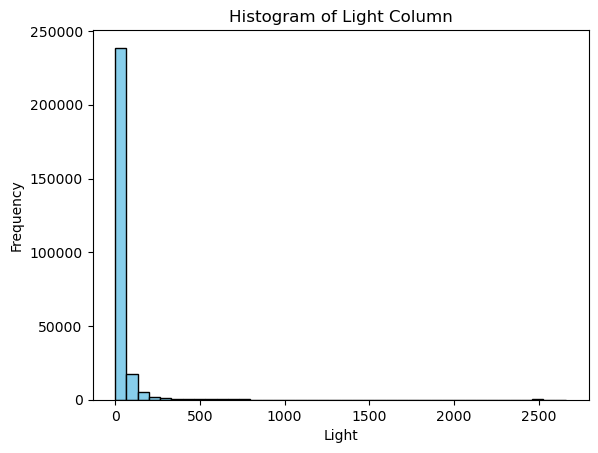

In [15]:
test['light'].plot(kind='hist', bins=40, color='skyblue', edgecolor='black')

plt.xlabel('Light')
plt.ylabel('Frequency')
plt.title('Histogram of Light Column')
plt.show()

In [16]:
# Find the minimum value in the 'light' column
min_light = test['light'].min()

# Find the maximum value in the 'light' column
max_light = test['light'].max()

print(min_light)
print(max_light)

0.0
2659.666748046875


In [17]:
# Count the occurrences of 0 and 1 in the 'non-wear_flag' column
flag_counts = test['non-wear_flag'].value_counts()

# Display the counts
print(flag_counts)

0.0    269335
Name: non-wear_flag, dtype: int64


In [18]:
# Count the number of negative values in 'relative_date_PCIAT'
negative_count = (test['relative_date_PCIAT'] < 0.0).sum()

# Display the count
print(f"Number of negative values in relative_date_PCIAT: {negative_count}")

# Find the minimum value in 'relative_date_PCIAT'
min_relative_date = test['relative_date_PCIAT'].min()

# Display the result
print(f"Minimum value in relative_date_PCIAT: {min_relative_date}")

Number of negative values in relative_date_PCIAT: 0
Minimum value in relative_date_PCIAT: 28.0


In [39]:
# Group by 'id' and 'relative_date_PCIAT', then count the number of rows for each group
distribution = test.groupby(['id', 'relative_date_PCIAT']).size().reset_index(name='num_records')

# To see the distribution, you can view the first few rows
print(distribution.head(20))

          id  relative_date_PCIAT  num_records
0   0d01bbf2                 28.0         2400
1   0d01bbf2                 29.0         7794
2   0d01bbf2                 30.0         6089
3   0d01bbf2                 31.0         1456
4   0d01bbf2                 32.0         1389
5   0d01bbf2                 33.0         8127
6   0d01bbf2                 34.0          859
7   0d01bbf2                 35.0         9714
8   0d01bbf2                 36.0         9899
9   0d01bbf2                 37.0        10005
10  0d01bbf2                 38.0         8809
11  0d01bbf2                 39.0         9024
12  0d01bbf2                 40.0         9329
13  0d01bbf2                 41.0         9778
14  0d01bbf2                 42.0        10015
15  0d01bbf2                 43.0        10284
16  0d01bbf2                 44.0        12043
17  0d01bbf2                 45.0        10242
18  0d01bbf2                 46.0         9828
19  0d01bbf2                 47.0         9475


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269335 entries, 0 to 269334
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   step                 269335 non-null  uint32 
 1   X                    269335 non-null  float32
 2   Y                    269335 non-null  float32
 3   Z                    269335 non-null  float32
 4   enmo                 269335 non-null  float32
 5   anglez               269335 non-null  float32
 6   non-wear_flag        269335 non-null  float32
 7   light                269335 non-null  float32
 8   battery_voltage      269335 non-null  float32
 9   time_of_day          269335 non-null  int64  
 10  weekday              269335 non-null  int8   
 11  quarter              269335 non-null  int8   
 12  relative_date_PCIAT  269335 non-null  float32
 13  id                   269335 non-null  object 
 14  day_name             269335 non-null  object 
 15  light_description

In [21]:
# Define the lux levels of interest
lux_levels_of_interest = ['TVs', 'Office Lighting', 'Desktop Computers']

# Create a new column 'lux_interest_flag' that is 1 for the specified lux levels and 0 for the rest
test['lux_interest_flag'] = test['light_description'].apply(lambda x: 1 if x in lux_levels_of_interest else 0)

# Print the updated DataFrame with the new column
test.head(20)

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id,day_name,light_description,lux_interest_flag
0,0,-0.468869,0.412020,-0.236458,0.042506,-19.824650,0.0,27.666666,4179.000000,57480000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers,1
1,1,-0.662526,0.533484,0.064034,0.052847,4.300246,0.0,12.666667,4178.666504,57485000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers,1
2,2,-0.611384,0.227252,-0.150882,0.060734,-16.545208,0.0,47.000000,4178.333496,57490000000000,4,1,28.0,0d01bbf2,Thursday,Unknown Lux Level,0
3,3,-0.385799,0.552782,-0.500523,0.070440,-36.452175,0.0,63.799999,4178.000000,57495000000000,4,1,28.0,0d01bbf2,Thursday,Unknown Lux Level,0
4,4,0.016133,0.031981,-0.825109,0.081058,-67.488388,0.0,6.000000,4177.666504,57500000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers,1
5,5,0.111447,-0.026677,-0.992046,0.013062,-83.395927,0.0,17.500000,4177.333496,57505000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers,1
6,6,0.254066,0.040278,-0.923824,0.024093,-73.851051,0.0,29.000000,4177.000000,57510000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers,1
7,7,0.067536,0.619501,-0.516291,0.047309,-35.223614,0.0,40.500000,4176.666504,57515000000000,4,1,28.0,0d01bbf2,Thursday,Unknown Lux Level,0
8,8,-0.057226,0.551338,-0.530081,0.050739,-39.340076,0.0,21.250000,4176.333496,57520000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers,1
9,9,-0.332856,0.038781,-0.547539,0.045239,-49.816551,0.0,21.799999,4176.000000,57525000000000,4,1,28.0,0d01bbf2,Thursday,Desktop Computers,1


In [22]:
# Group by 'id' and 'relative_date_PCIAT', then count the number of rows for each group
distribution = test.groupby(['id', 'relative_date_PCIAT']).agg(
    num_records=('light_description', 'size'),
    lux_interest_count=('lux_interest_flag', 'sum')
).reset_index()

distribution.head(20)

,id,relative_date_PCIAT,num_records,lux_interest_count
0,0d01bbf2,28.0,2400,2307
1,0d01bbf2,29.0,7794,5523
2,0d01bbf2,30.0,6089,5170
3,0d01bbf2,31.0,1456,1177
4,0d01bbf2,32.0,1389,1166
5,0d01bbf2,33.0,8127,7379
6,0d01bbf2,34.0,859,821
7,0d01bbf2,35.0,9714,6359
8,0d01bbf2,36.0,9899,6986
9,0d01bbf2,37.0,10005,7991


In [26]:
distribution['lux_interest_percentage'] = round(((distribution['lux_interest_count'] / distribution['num_records']) * 100),2)

In [27]:
distribution.head(20)

,id,relative_date_PCIAT,num_records,lux_interest_count,lux_interest_percentage
0,0d01bbf2,28.0,2400,2307,96.12
1,0d01bbf2,29.0,7794,5523,70.86
2,0d01bbf2,30.0,6089,5170,84.91
3,0d01bbf2,31.0,1456,1177,80.84
4,0d01bbf2,32.0,1389,1166,83.95
5,0d01bbf2,33.0,8127,7379,90.80
6,0d01bbf2,34.0,859,821,95.58
7,0d01bbf2,35.0,9714,6359,65.46
8,0d01bbf2,36.0,9899,6986,70.57
9,0d01bbf2,37.0,10005,7991,79.87


## Tiffany's Notes

For each parquet, we could map the light (lux) values to the respective light descriptions. Then assign a 1 to TVs, Office Lighting, and Desktop Computers ("lux_interest_flag"), assuming these are light patterns that indicate screen time, and 0 to all other categories. Then, we can create a dataframe showing by day ("relative_date_PCIAT") the total number of records ("steps") and the associated number of lines indicating screen time (sum of the 1's in "lux_interest_flag"). 

Lux_interest_count / num_records would be the percentage of activity spent in front of a screen while wearing the wrist watch.

Then for each participant, we could calculate the overall average percentage across the total days spent wearing the wrist watch. The idea being that higher percentage would probably contribute to less overall activity -- high SII value in the other dataset.